# DECISION TREE

In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [20]:
df_wine = pd.read_csv('white_wine.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


In [21]:
df_wine[['density','alcohol']].isna().sum()

density    0
alcohol    1
dtype: int64

In [22]:
# imputing missing values
df_wine['alcohol'].fillna(df_wine['alcohol'].median(), inplace=True)

In [23]:
df_wine[['density','alcohol']].isna().sum()

density    0
alcohol    0
dtype: int64

In [26]:
df_wine['label'] = np.where(df_wine['quality']>6, 1, 0)
df_wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
268,5.3,0.585,0.07,7.1,0.044,34.0,145.0,0.9945,3.34,0.57,9.7,6.0,0
408,6.3,0.140,0.39,1.2,0.044,26.0,116.0,0.9920,3.26,0.53,10.3,6.0,0
27,7.0,0.280,0.39,8.7,0.051,32.0,141.0,0.9961,3.38,0.53,10.5,6.0,0
148,6.3,0.340,0.33,4.6,0.034,19.0,80.0,0.9967,3.38,0.58,12.0,7.0,1
142,7.9,0.210,0.40,1.2,0.039,38.0,107.0,0.9920,3.21,0.54,10.8,6.0,0


### Define Features and Target

In [27]:
X = df_wine[['density','alcohol']]
y = df_wine['label']

### Train Test Split

Generalization

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y, 
    test_size=0.2, 
    random_state=2020
)

### Modeling Decision Tree (without scaling)

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [56]:
# define model 
tree = DecisionTreeClassifier(criterion='gini', max_depth=2)

# fitting
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [57]:
# predict
y_pred = tree.predict(X_test)

# accuracy
accuracy_score(y_test, y_pred)

0.9519230769230769

In [58]:
X_train.shape

(416, 2)

In [59]:
y_train.value_counts()

0    338
1     78
Name: label, dtype: int64

<AxesSubplot:xlabel='density', ylabel='alcohol'>

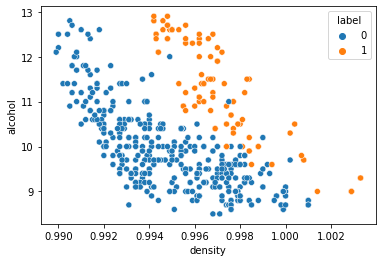

In [60]:
# EDA: scatterplot alcohol vs density
sns.scatterplot(data=df_wine, x='density', y='alcohol', hue='label')

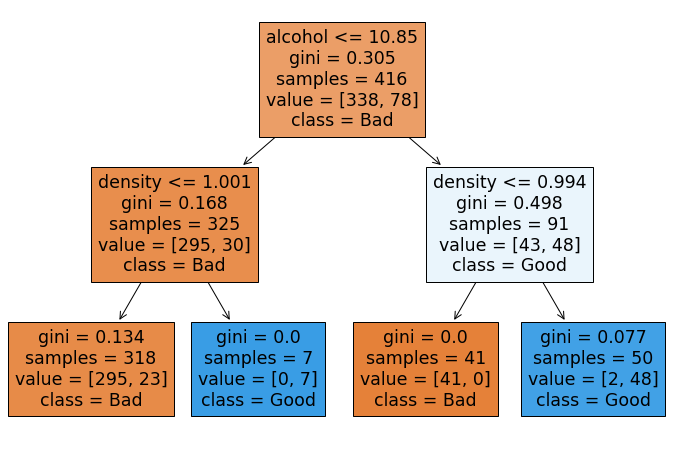

In [62]:
# Plot tree

plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=list(X), filled=True, class_names=['Bad', 'Good'])
plt.show()

**Interpretasi**

- Jika ada wine dengan alcohol <= 10.85 dan density <= 1.001 maka wine tersebut masuk ke dalam kelas Bad (class 0)
- Jika ada wine dengan alcohol <= 10.85 dan density > 1.001 maka wine tersebut masuk ke dalam kelas Good (class 1)

- Jika ada wine dengan alcohol > 10.85 dan density <= 0.994 maka wine tersebut masuk ke dalam kelas Bad (class 0)
- Jika ada wine dengan alcohol > 10.85 dan density > 0.994 maka wine tersebut masuk ke dalam kelas Good (class 1)


### Modeling Decision Tree (with scaling)

In [63]:
# scaling
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# define model 
tree = DecisionTreeClassifier(criterion='gini', max_depth=2)

# fitting
tree.fit(X_train_scaled, y_train)

# predict
y_pred_scaled = tree.predict(X_test_scaled)

# accuracy
accuracy_score(y_test, y_pred_scaled)

0.9519230769230769

**Performa model Decision Tree tidak dipengaruhi oleh scaling**

- Tanpa scaling: 95.1%
- Dengan scaling: 95.1%

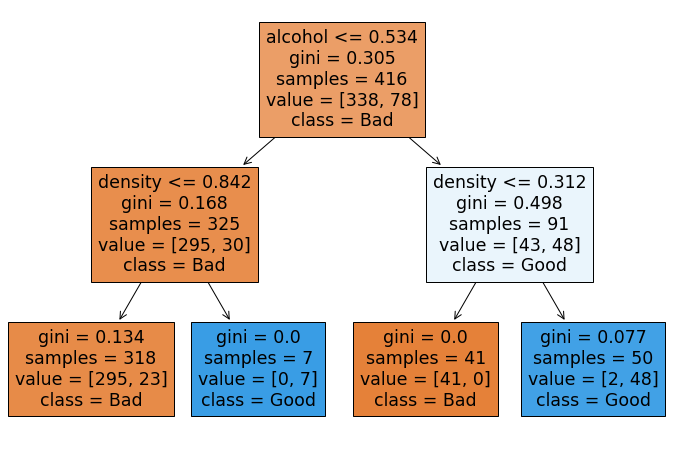

In [66]:
# Plot tree

plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=list(X), filled=True, class_names=['Bad', 'Good'])
plt.show()

Interpretasi menggunakan plot tree menjadi lebih sulit ketika featurenya dilakukan scaaling, karena skala tiap feature sudah bukan skala aslinya